In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../src')

In [17]:
from torch.utils.data import DataLoader
from data.scannet.stats import ScanNetDataset

from utils.metrics import rotation_angle_distance
import numpy as np
from numpy.linalg import norm

from tqdm.auto import tqdm
import seaborn as sns

In [20]:
train_data = ScanNetDataset(
    root_dir='/home/project/data/scans/',
    npz_path='/home/project/code/data/scannet_splits/smart_sample_train.npz'
)

val_data = ScanNetDataset(
    root_dir='/home/project/data/scans/',
    npz_path='/home/project/code/data/scannet_splits/smart_sample_val.npz',
)

test_data = ScanNetDataset(
    root_dir='/home/project/ScanNet/scannet_test_1500/',
    npz_path='/home/project/ScanNet/test.npz',
)


In [16]:
angle_distances = []
t_distances = []

for i in tqdm(range(len(train_data))):
    R = train_data[i][:3, :3]
    t = train_data[i][:3, -1]
    angle_distances.append(rotation_angle_distance(R, np.eye(3)))
    t_distances.append(norm(t))

  0%|          | 0/1261413 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

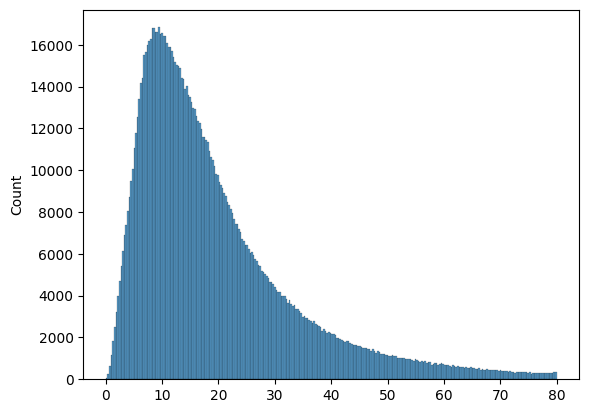

In [18]:
sns.histplot(angle_distances)

<Axes: ylabel='Count'>

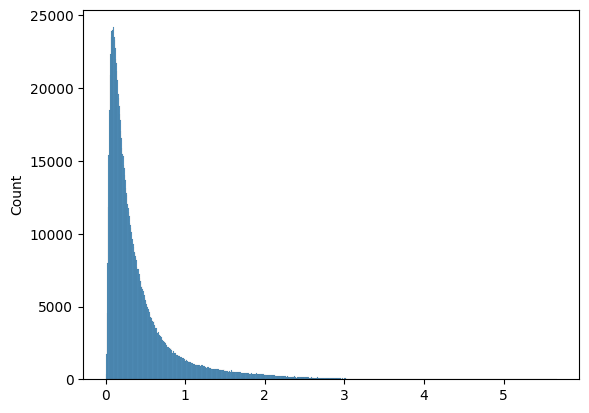

In [19]:
sns.histplot(t_distances)

In [42]:
np.quantile(t_distances, 0.9999)

4.345914625032897

In [43]:
1_200_000 * 0.0001

120.0

In [34]:
angle_distances_test = []
t_distances_test = []

for i in tqdm(range(len(test_data))):
    R = test_data[i][:3, :3]
    t = test_data[i][:3, 3]
    angle_distances_test.append(rotation_angle_distance(R, np.eye(3)))
    t_distances_test.append(norm(t, ord=2))

  0%|          | 0/1500 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

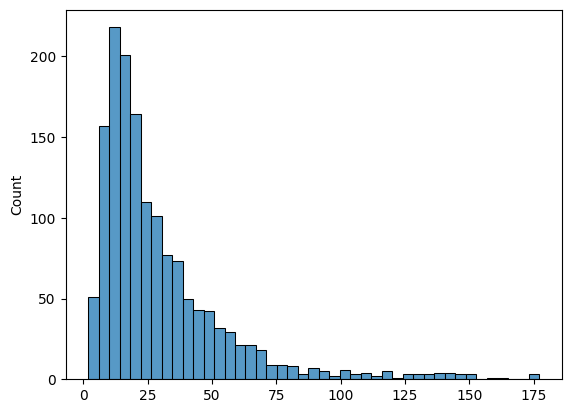

In [35]:
sns.histplot(angle_distances_test)

<Axes: ylabel='Count'>

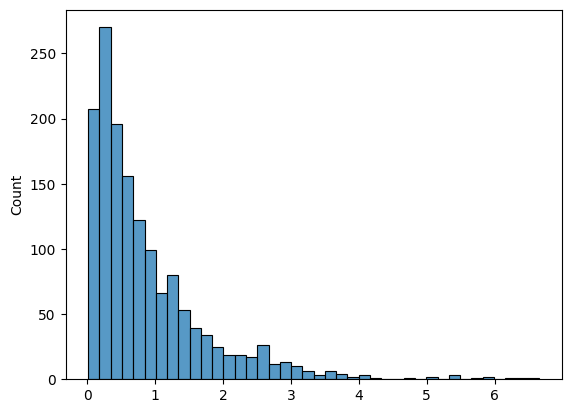

In [36]:
sns.histplot(t_distances_test, bins=40)